In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import pylab
from matplotlib import cm

# Read in data

## Chondrite abundances

In [2]:
# Read the CSV file containing chondrite abundances
chondrite_abundances = pd.read_csv('Abunds_allnew_13jun2023.csv')

# Set the 'Element' column as the index of chondrite_abundances DataFrame
chondrite_abundances = chondrite_abundances.set_index('Element')

# Access the CI (Carbonaceous Chondrite) column from chondrite_abundances DataFrame
CI = chondrite_abundances.CI

## 2019 data

In [3]:
# Read the CSV files for data from 2019 (SQ, Ca, Si, and Mg)
data_2019_sq = pd.read_csv('2019_LA_CVdata_SQ_input.csv')
data_2019_ca = pd.read_csv('2019_LA_CVdata_Ca_input.csv')
data_2019_si = pd.read_csv('2019_LA_CVdata_Si_input.csv')
data_2019_mg = pd.read_csv('2019_LA_CVdata_Mg_input.csv')

In [4]:
# Create a list of DataFrame names
data_2019 = ['data_2019_sq', 'data_2019_ca', 'data_2019_si', 'data_2019_mg']

# Iterate over each DataFrame in the data_2019 list
for dataframe_name in data_2019:
    # Access the DataFrame by its name using eval()
    df = eval(dataframe_name)

    # Iterate over each column in the DataFrame
    for col in df.columns:
        # Check if the column has numeric values
        if pd.to_numeric(df[col], errors='coerce').dtype != object:
            # Replace negative numeric values with NaN
            df[col] = np.where(pd.to_numeric(df[col], errors='coerce') < 0, np.nan, df[col])

In [5]:
# Add a new column 'Tm/Lu' and 'Pr/Er' to identify type II clasts for each DataFrame in data_2019
for dname in data_2019:
    # Replace all zeros with NaNs in the DataFrame
    locals()[dname] = locals()[dname].replace(0, np.nan)
    
    # Calculate the 'Tm/Lu' ratio for each row in the DataFrame
    locals()[dname]['Tm/Lu'] = locals()[dname].apply(lambda row: (row['Tm169_ppm_mean'] / CI.Tm) / (row['Lu175_ppm_mean'] / CI.Lu), axis=1)
    
    #calculate the Pr/Er ratio for each row
    locals()[dname]['Pr/Er'] = locals()[dname].apply(lambda row: (row['Pr141_ppm_mean'] / CI.Pr) / (row['Er166_ppm_mean'] / CI.Er), axis=1)

## 2022 data

In [6]:
# Read the CSV files for data from 2022 (SQ, Ca, Si, Mg, and Al)
data_2022_sq = pd.read_csv('2022_June_SQ_input2.csv')
data_2022_ca = pd.read_csv('2022_June_Ca_input2.csv')
data_2022_si = pd.read_csv('2022_June_Si_input2.csv')
data_2022_mg = pd.read_csv('2022_June_Mg_input2.csv')
data_2022_al = pd.read_csv('2022_June_Al_input2.csv')

In [7]:
# Create a list of DataFrame names
data_2022 = ['data_2022_sq', 'data_2022_ca', 'data_2022_si', 'data_2022_mg', 'data_2022_al']

# Iterate over each DataFrame in the data_2022 list
for dataframe_name in data_2022:
    # Access the DataFrame by its name using eval()
    df = eval(dataframe_name)

    # Iterate over each column in the DataFrame
    for col in df.columns:
        # Check if the column has numeric values
        if pd.to_numeric(df[col], errors='coerce').dtype != object:
            # Replace negative numeric values with NaN
            df[col] = np.where(pd.to_numeric(df[col], errors='coerce') < 0, np.nan, df[col])

In [8]:
# Add a new column 'Tm/Lu' to identify type II clasts for each DataFrame in data_2022
for dname in data_2022:
    # Replace all zeros with NaNs in the DataFrame
    locals()[dname] = locals()[dname].replace(0, np.nan)
    
    # Calculate the 'Tm/Lu' ratio for each row in the DataFrame
    locals()[dname]['Tm/Lu'] = locals()[dname].apply(lambda row: (row['Tm169_ppm_mean'] / CI.Tm) / (row['Lu175_ppm_mean'] / CI.Lu), axis=1)
    
    #calculate the Pr/Er ratio for each row
    locals()[dname]['Pr/Er'] = locals()[dname].apply(lambda row: (row['Pr141_ppm_mean'] / CI.Pr) / (row['Er166_ppm_mean'] / CI.Er), axis=1)

## Partition Coefficents

In [144]:
#data from Gokce 2019
data = {
    'Element': ['Ti', 'Ca', 'Sr', 'Zr', 'Nb', 'Ba', 'La', 'Ce', 'Eu', 'Dy', 'Ho', 'Yb', 'Hf', 'Ta', 'Th'],
    'D_i': [0.059, np.nan, np.nan, 0.003, 0.006, np.nan, 0.004, 0.006, 0.005, 0.008, 0.011, 0.028, 0.003, 0.003, np.nan]
    # Add more columns as needed
}
Di = pd.DataFrame(data)

In [145]:
ci = [CI.Ti, CI.Ca, CI.Sr, CI.Zr, CI.Nb, CI.Ba, CI.La, CI.Ce, CI.Eu, CI.Dy, CI.Ho, CI.Yb, CI.Hf, CI.Ta, CI.Th] #lodders 2021

In [146]:
elements = ['Ti', 'Ca', 'Sr', 'Zr', 'Nb', 'Ba', 'La', 'Ce', 'Eu', 'Dy', 'Ho', 'Yb', 'Hf', 'Ta', 'Th']

In [147]:
Di

,Element,D_i
0,Ti,0.059
1,Ca,NaN
2,Sr,NaN
3,Zr,0.003
4,Nb,0.006
5,Ba,NaN
6,La,0.004
7,Ce,0.006
8,Eu,0.005
9,Dy,0.008


## cleaning up data

In [148]:
columns = ['LA_Name', 'Met_Name', 'Object','Phase', 'Component', 
           'Ti48_ppm_mean', 'Ca43_ppm_mean', 'Sr88_ppm_mean',
           'Zr90_ppm_mean','Nb93_ppm_mean', 'Ba137_ppm_mean', 'La139_ppm_mean', 
           'Ce140_ppm_mean','Eu153_ppm_mean', 'Dy163_ppm_mean', 'Ho165_ppm_mean', 
           'Yb172_ppm_mean','Hf178_ppm_mean', 'Ta181_ppm_mean', 'Th232_ppm_mean']

In [149]:
olv2019 = data_2019_sq[(data_2019_sq.Phase=='olv') & (data_2019_sq.Component=='chondrule')][columns]
olv2022 = data_2022_sq[(data_2022_sq.Phase=='olv') & (data_2022_sq.Component=='chondrule')][columns]
olv = pd.concat([olv2019, olv2022])

In [150]:
gls2019 = data_2019_sq[(data_2019_sq.Phase=='gls') & (data_2019_sq.Component=='chondrule')][columns]
gls2022 = data_2022_sq[(data_2022_sq.Phase=='gls') & (data_2022_sq.Component=='chondrule')][columns]
gls = pd.concat([gls2019, gls2022])

In [151]:
gls_avg = gls.groupby(['Met_Name', 'Object']).mean()
gls_avg_ci = gls_avg.div(ci, axis=1)

/tmp/ipykernel_841/3525219804.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gls_avg = gls.groupby(['Met_Name', 'Object']).mean()


In [152]:
olv_avg_meas = olv.groupby(['Met_Name', 'Object']).mean()
olv_avg_meas_ci = olv_avg_meas.div(ci, axis=1)

/tmp/ipykernel_841/647802435.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  olv_avg_meas = olv.groupby(['Met_Name', 'Object']).mean()


In [160]:
olv_avg_calc_ci = gls_avg_ci.mul(np.array(Di.D_i), axis=1)

In [154]:
chondrules = gls_avg.index

/tmp/ipykernel_841/322674992.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(7,4))


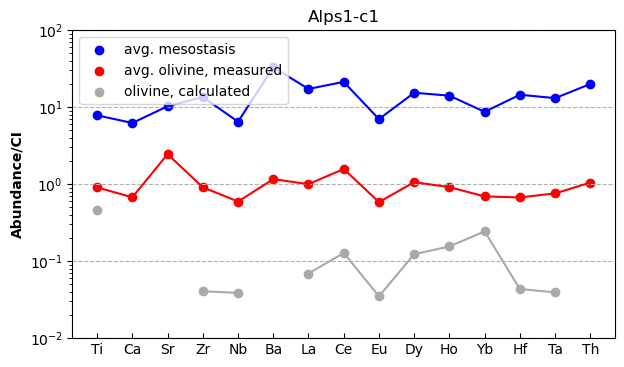

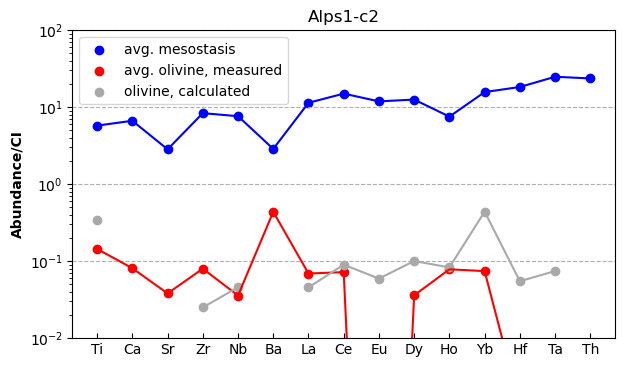

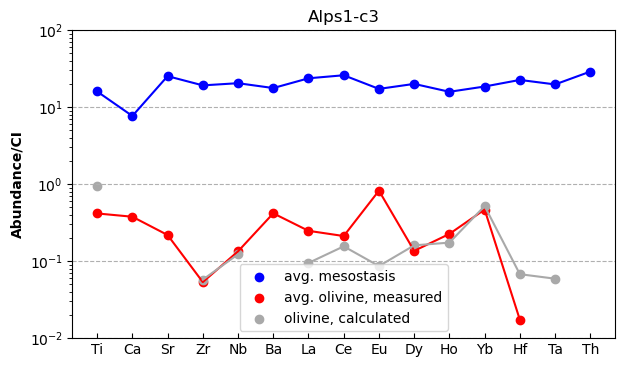

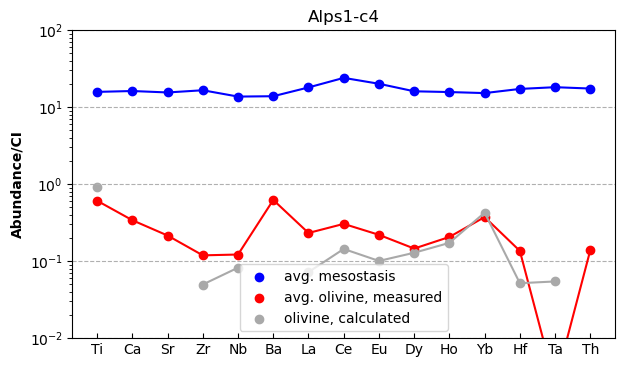

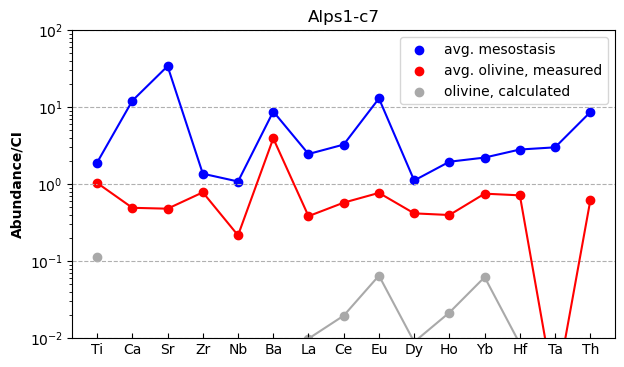

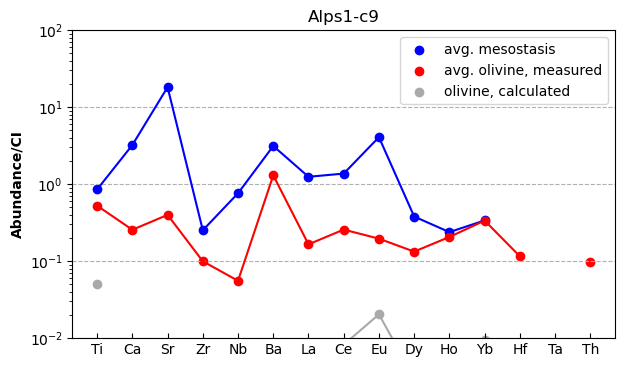

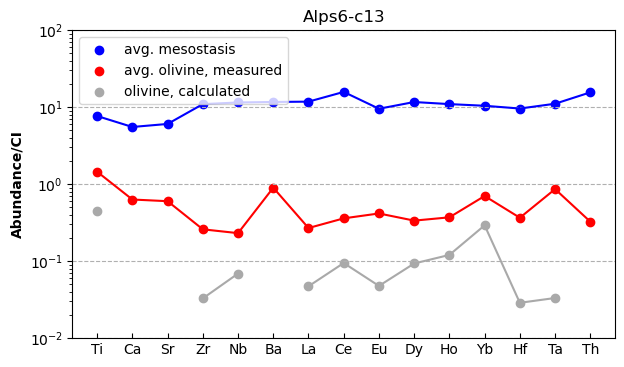

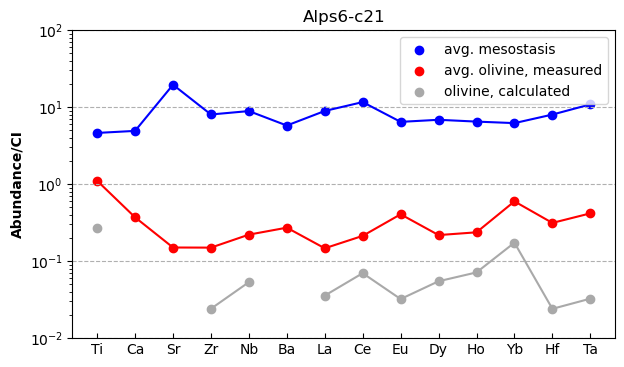

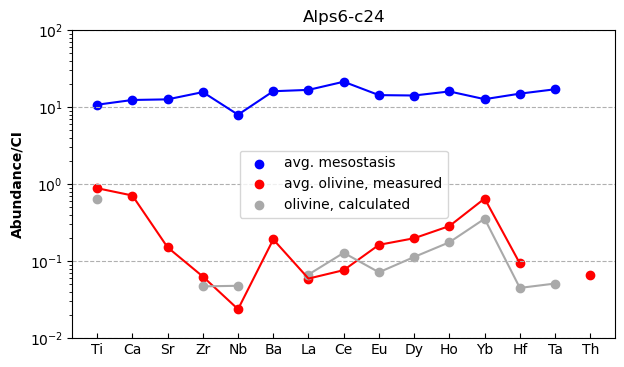

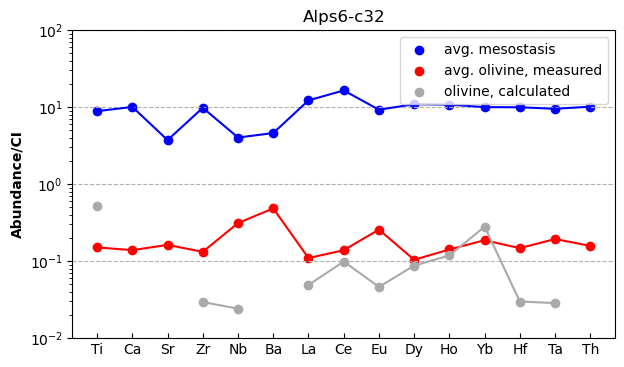

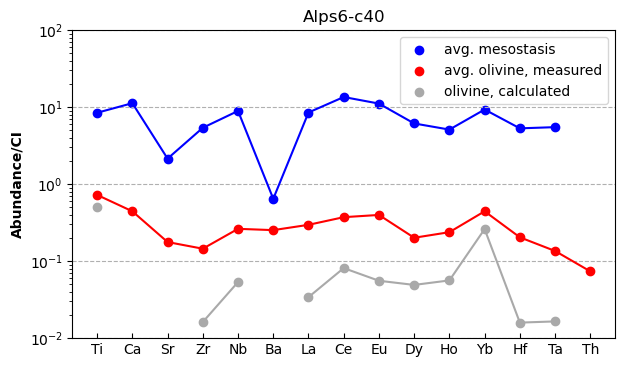

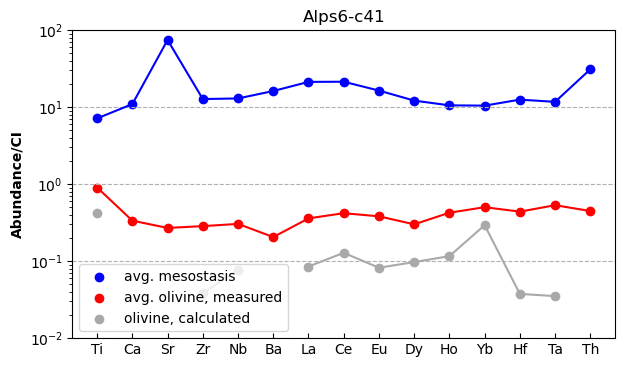

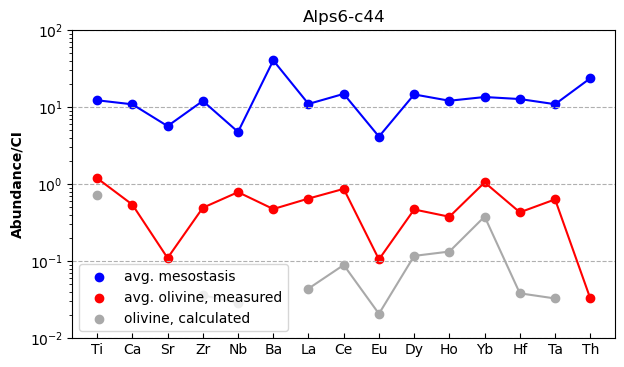

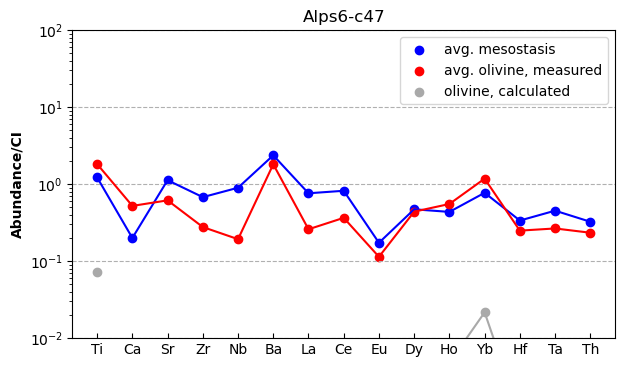

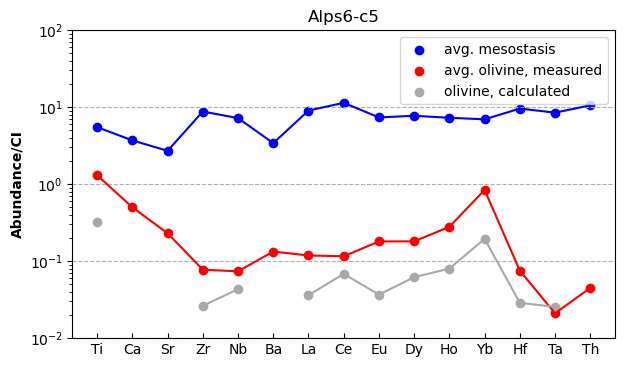

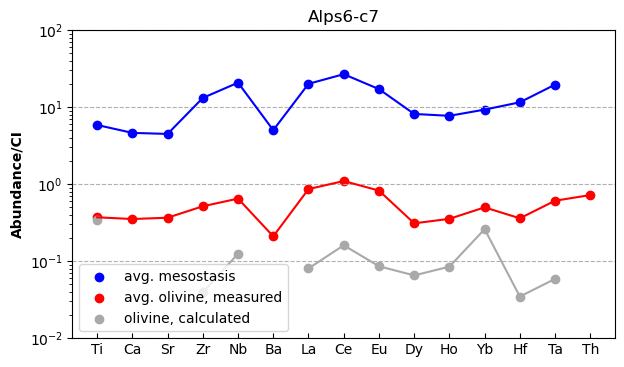

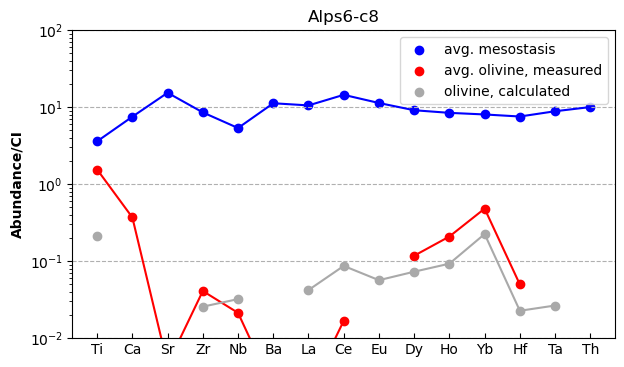

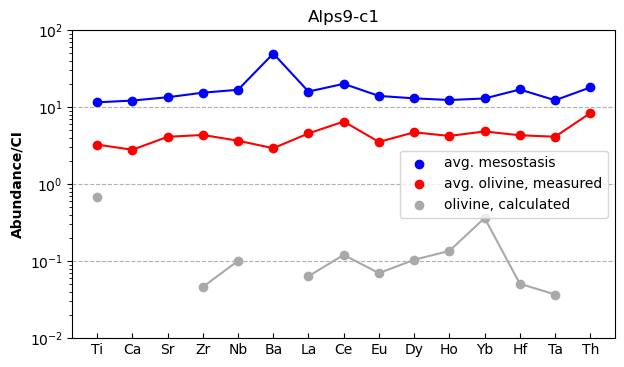

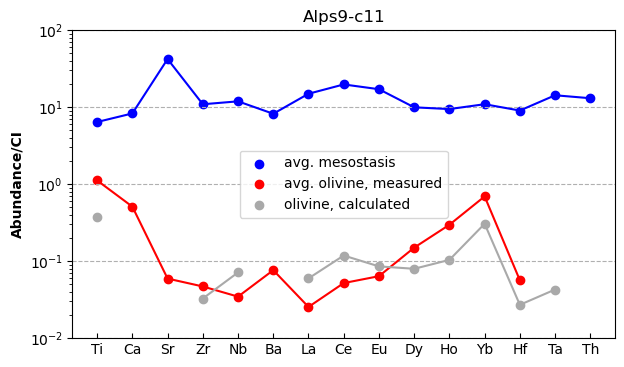

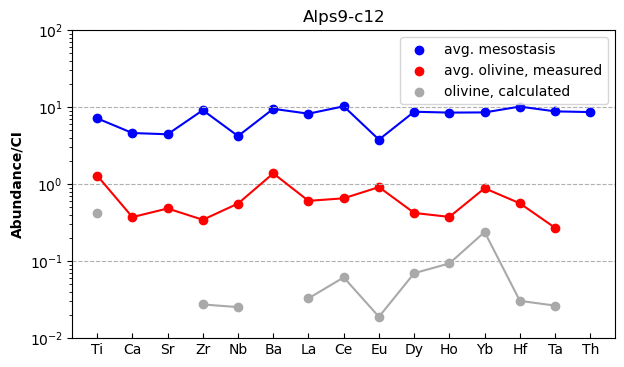

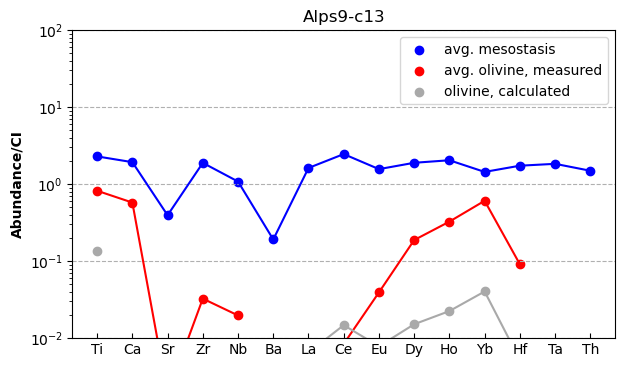

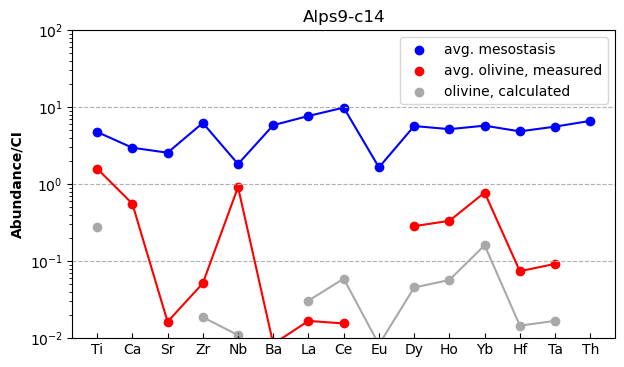

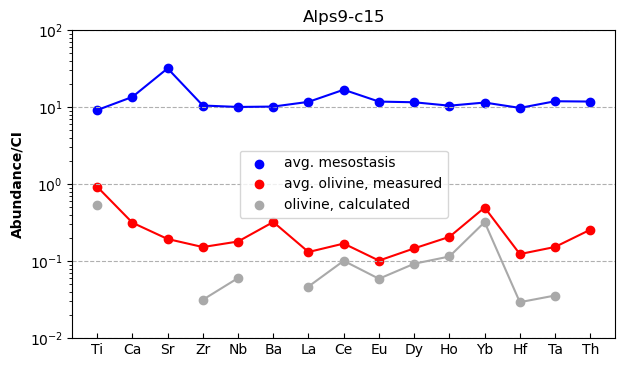

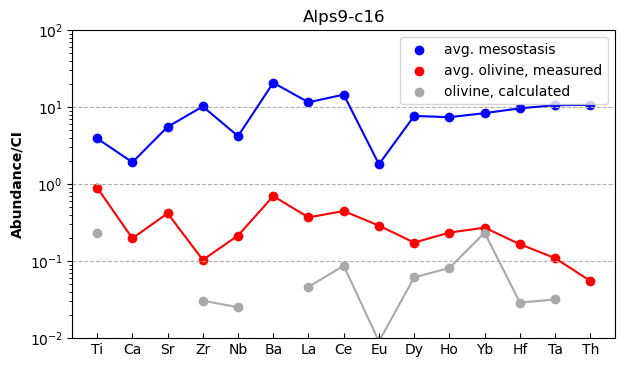

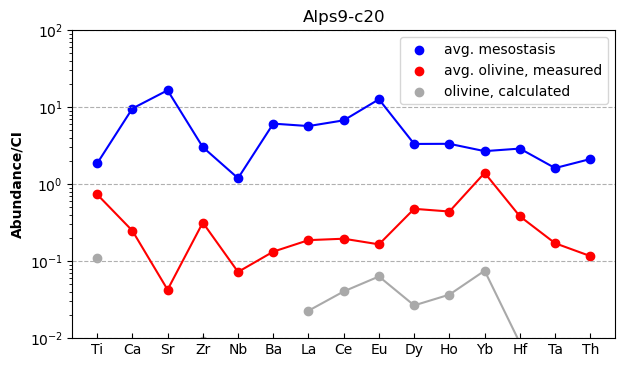

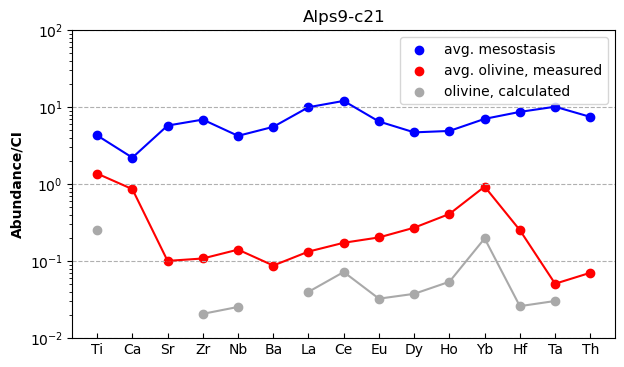

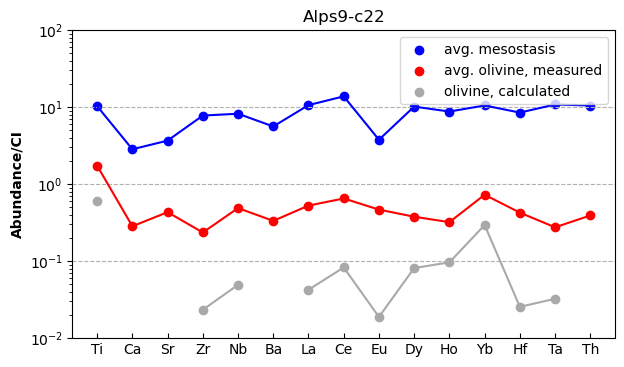

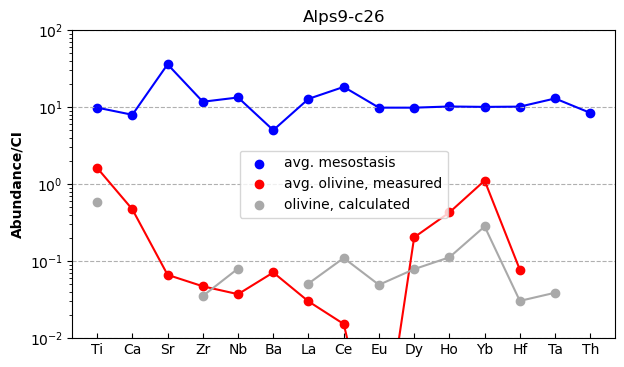

In [171]:
for i in range(0, 30):#len(chondrules)):
    if chondrules[i] in olv_avg_meas.index:
        #setting up plot
        fig, ax = plt.subplots(figsize=(7,4))

        ax.set_ylabel('Abundance/CI', fontweight='bold')
        ax.set_yscale("log") 
        ax.set_ylim([10**-2, 10**2])
        ax.grid(axis='y', linestyle='--', zorder=0)
        ax.set_title(chondrules[i][0]+'-'+chondrules[i][1])

        ax.tick_params(axis='x', direction='in')

        #plotting
        #glass
        ax.scatter(elements, gls_avg_ci.loc[chondrules[i]], color='blue', label='avg. mesostasis')
        ax.plot(elements, gls_avg_ci.loc[chondrules[i]], color='blue')

        #olivine measured
        ax.scatter(elements, olv_avg_meas_ci.loc[chondrules[i]], color='red', label='avg. olivine, measured')
        ax.plot(elements, olv_avg_meas_ci.loc[chondrules[i]], color='red')

        #olivine calculated
        ax.scatter(elements, olv_avg_calc_ci.loc[chondrules[i]], color='darkgrey', label='olivine, calculated')
        ax.plot(elements, olv_avg_calc_ci.loc[chondrules[i]], color='darkgrey')

        ax.legend()